
<h1>Exploratory data analysis (EDA): Data cleaning and preparation<h1>
<h3>Mohan Bakshi</h3>

# Loading Data

In [8]:
# Import the useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.mode.chained_assignment = None # default='warn'
# Read the data set of "Marketing Analysis" in data.
marketing_data= pd.read_csv("datasets/marketing_analysis.csv", dtype='unicode')
# Print the data
marketing_data

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [ ]:
# Read the file in data without first two rows as it is of no use.
marketing_data = pd.read_csv("marketing_analysis.csv",skiprows = 2)
# Printing the head of the data frame.
marketing_data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# Data Cleaning

In [ ]:
# Drop the customer id as it is of no use.
marketing_data.drop('customerid', axis = 1, inplace = True)

In [ ]:
#Extract job & Education in newly from "jobedu" column.
marketing_data['job']= marketing_data["jobedu"].apply(lambda x:
x.split(",")[0])
marketing_data['education']= marketing_data["jobedu"].apply(lambda
x: x.split(",")[1])
# Drop the "jobedu" column from the dataframe.
marketing_data.drop('jobedu', axis = 1, inplace = True)
# Print the Dataset
marketing_data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [ ]:
# Check the missing values
marketing_data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [ ]:
# Dropping the records with age missing in data dataframe.
marketing_data = marketing_data[~marketing_data.age.isnull()].copy()

# Checking the missing values in the dataset.
marketing_data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [ ]:
# find the mode of the month in data
month_mode= marketing_data.month.mode()[0]

# Fill the misiing values with mode value of month in data
marketing_data.fillna({'month': month_mode}, inplace=True)

# Lets see the null values in the month column.
marketing_data.month.isnull().sum()

0

In [ ]:
# drop the records with response misiing in data.
marketing_data= marketing_data[~marketing_data.response.isnull()].copy()

#Calculate the misiing values in each column at data frame
marketing_data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

# Univariate Analysis

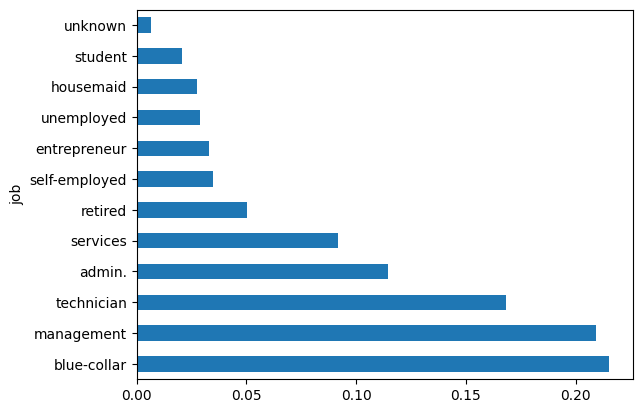

In [ ]:
# Let's calculate the percentage of each job status category
marketing_data.job.value_counts(normalize=True)

#plot the bar graph of percentage job categories
marketing_data.job.value_counts(normalize=True).plot.barh()
plt.show()

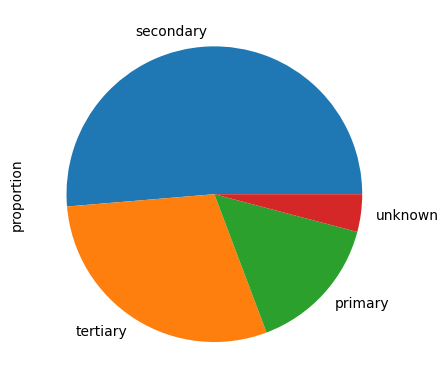

In [ ]:
#calculate the percentage of each education category.
marketing_data.education.value_counts(normalize=True)

#plot the pie chart of education categories
marketing_data.education.value_counts(normalize=True).plot.pie()
plt.show()

In [ ]:
marketing_data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

# Bivariate Analysis

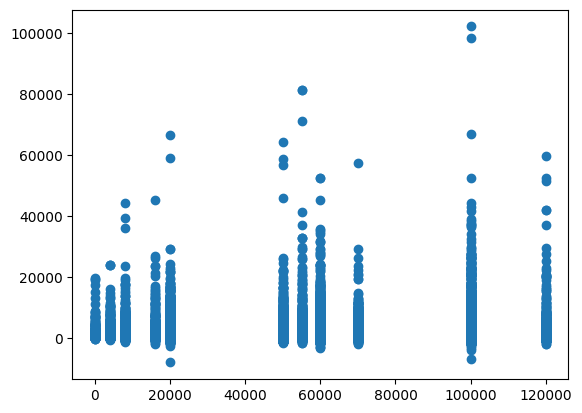

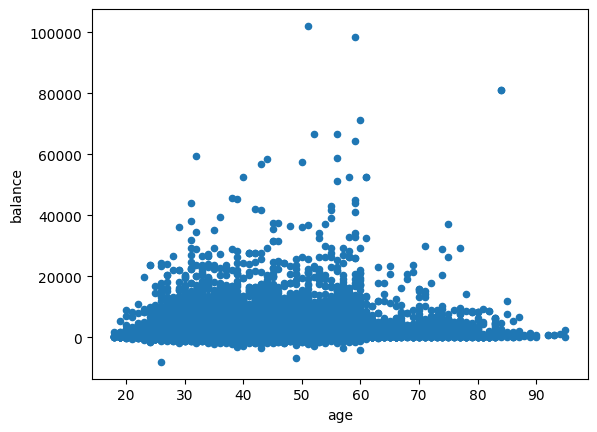

In [ ]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(marketing_data.salary,marketing_data.balance)
plt.show()

#plot the scatter plot of balance and age variable in data
marketing_data.plot.scatter(x="age",y="balance")
plt.show()

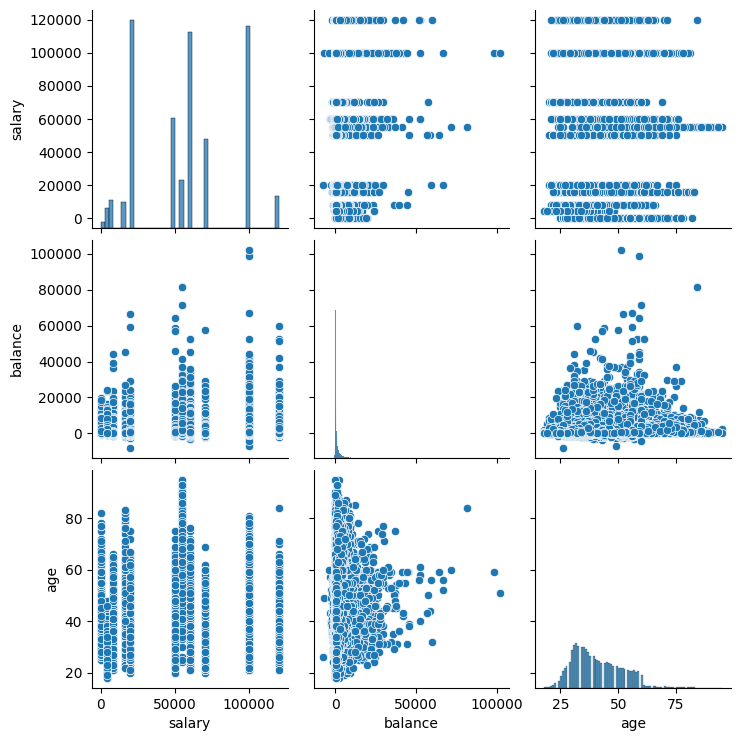

In [ ]:
#Plot the pair plot of salary, balance and age in marketing_data dataframe.
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

sns.pairplot(data=marketing_data, vars=['salary','balance','age'])
plt.show()

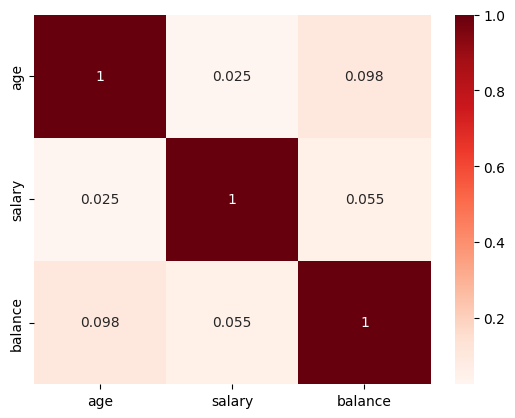

In [ ]:
# Creating a matrix using age, salary, balance as rows and columns
correlation_data= marketing_data[['age','salary','balance']].corr()

# Plot the correlation matrix of salary , balance and age in marketing_data  dataFrame.
sns.heatmap(correlation_data, annot=True, cmap='Reds')
plt.show()

In [ ]:
print(marketing_data.columns)

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object')


# Numeric-Categorical Analysis

In [ ]:
# groupby the response to find the mean of the salary with response no & yes seperately.
marketing_data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [ ]:
# groupby the response to find the median of the salary with response no & yes seperately.
marketing_data.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

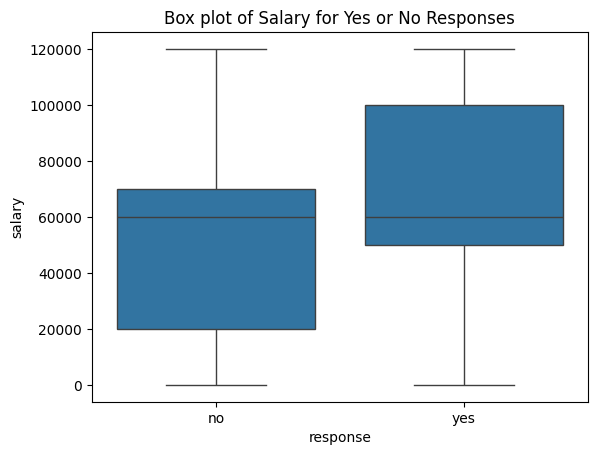

In [ ]:
# plot the box plot of salary for yes or no responses.
sns.boxplot(x='response', y='salary', data=marketing_data)
plt.title('Box plot of Salary for Yes or No Responses')
plt.show()


# Categorical-Categorical Analysis

In [ ]:
# create response rate of numerical data type where response "yes"=1 and "no"=0
marketing_data['response_rate']= np.where(marketing_data.response=='yes',1,0)
marketing_data.response_rate.value_counts()

response_rate
0    39876
1     5285
Name: count, dtype: int64

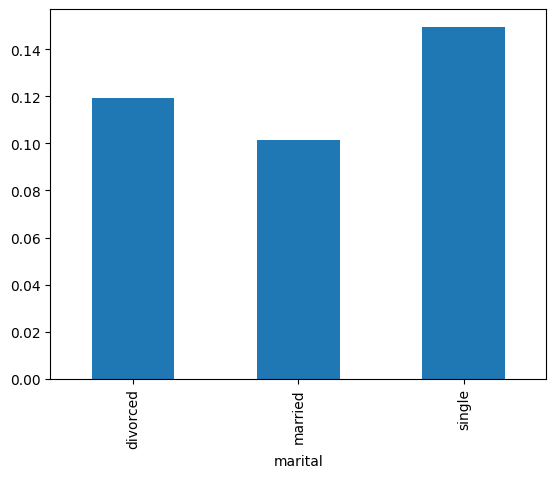

In [ ]:
#plot the bar graph of marital status with average value of response_rate
marketing_data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

# Multivariate Analysis

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


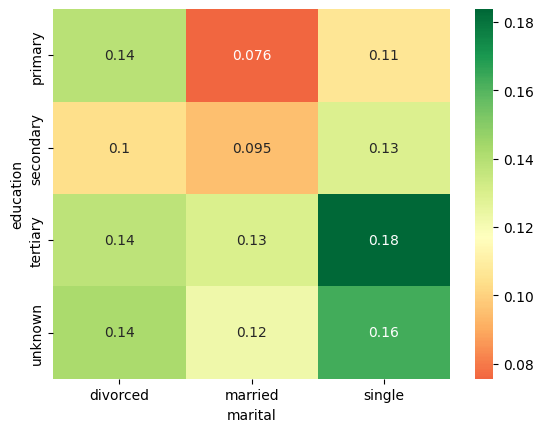

In [ ]:
# create pivot table
result=pd.pivot_table(marketing_data, index='education', columns='marital',values='response_rate')
print(result)

# create heap map of education vs martial vs response rate
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

# Question 1: Implement three alternative appraoches to handle missing values in the age and/or month columns. Explain why you decided to implement these approaches

In [ ]:
# Read the data set of "Marketing Analysis" in data.
marketing_data= pd.read_csv("marketing_analysis.csv", dtype='unicode', skiprows=2)
# Print the data
marketing_data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


# Approach 1 : Dropping missing values

**This approach is helpful in removing missing values when it's removal is not affecting dataset much.The missing values are very less as compared to the original rows in the data** 

In [ ]:
print('Count of rows of missing values for month column' , marketing_data.month.isnull().sum())

# Drop rows with any missing values
marketing_data = marketing_data.dropna(subset=['month'])

# Lets see the null values in the month column.
print('Count of rows after dropping missing values for month column', marketing_data.month.isnull().sum())

Count of rows of missing values for month column 50
Count of rows after dropping missing values for month column 0


# Approach 2: KNN Imputation

**This approach is helpful as it replaces missing values with more relevant values based on similar data points.**

In [ ]:
# KNN imputation with 5 neighbors on the target column
imputer = KNNImputer(n_neighbors=5)
df_imputed_knn = pd.DataFrame(imputer.fit_transform(marketing_data[['age']]), columns=['age'])
df_imputed_knn = pd.concat([marketing_data.drop('age', axis=1), df_imputed_knn], axis=1)
print("\nImputation (KNN):")
df_imputed_knn


Imputation (KNN):


,customerid,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,age
0,1,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,58.0
1,2,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,44.0
2,3,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,33.0
3,4,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,47.0
4,5,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
43021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0
43323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0
44131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0


# Approach 3: Encoding Missing Values

**This approach is helpful as its useful for models that can handle categorical features.**

In [ ]:
print("\nEncoding Missing Values:")
def impute_with_indicator(data, column):
  data.loc[:, column + '_missing'] = data[column].isnull()
  return data

df_encoded = impute_with_indicator(marketing_data.copy(), 'response')
df_encoded


Encoding Missing Values:


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,response_missing
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,False
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,False
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,False
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,False
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,False
45207,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,False
45208,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,False
45209,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,False


In [ ]:
marketing_data

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


# Question 2: Is there any outliers in our dataset? If yes, implement approach to handle them. If no,demonstrate how you made this conclusion 

In [ ]:
# As we want to convert these columns into numerical data formats so we can find unusual values.
marketing_data['age'] = pd.to_numeric(marketing_data['age'], errors='coerce')
marketing_data['salary'] = pd.to_numeric(marketing_data['salary'], errors='coerce')
marketing_data['balance'] = pd.to_numeric(marketing_data['balance'], errors='coerce')
marketing_data['day'] = pd.to_numeric(marketing_data['day'], errors='coerce')
marketing_data['pdays'] = pd.to_numeric(marketing_data['pdays'], errors='coerce')
marketing_data['campaign'] = pd.to_numeric(marketing_data['campaign'], errors='coerce')
marketing_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45161 non-null  object 
 1   age         45141 non-null  float64
 2   salary      45161 non-null  int64  
 3   balance     45161 non-null  int64  
 4   marital     45161 non-null  object 
 5   jobedu      45161 non-null  object 
 6   targeted    45161 non-null  object 
 7   default     45161 non-null  object 
 8   housing     45161 non-null  object 
 9   loan        45161 non-null  object 
 10  contact     45161 non-null  object 
 11  day         45161 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45161 non-null  object 
 14  campaign    45161 non-null  int64  
 15  pdays       45161 non-null  int64  
 16  previous    45161 non-null  object 
 17  poutcome    45161 non-null  object 
 18  response    45131 non-null  object 
dtypes: float64(1), int64(5), objec

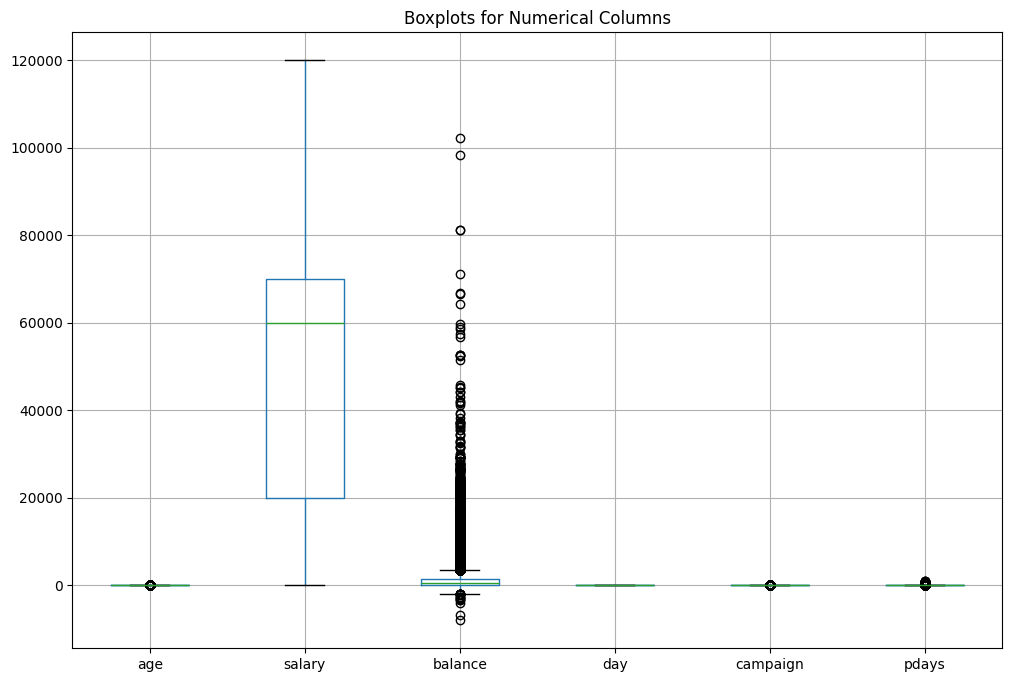

In [ ]:
#The marketing_data.boxplot() is a function that is used for creating box plots for numeric columns in order to visualise the outliers

marketing_data.boxplot(figsize=(12, 8), widths=0.5)
plt.title('Boxplots for Numerical Columns')
plt.show()

In [ ]:
import numpy as np

# Define the columns you want to Winsorize
columns = ['age', 'balance', 'campaign', 'pdays', 'salary', 'day']

# Define the percentile threshold for Winsorization 
winsor_percentile = 0.88

# Applying Winsorization to each column
for column in columns:
    # Calculate the threshold value for Winsorization
    threshold = np.percentile(marketing_data[column].dropna(), winsor_percentile * 100)
    
    # Winsorize the data by replacing values above the threshold with the threshold value
    marketing_data.loc[:, column] = np.where(marketing_data[column] > threshold, threshold, marketing_data[column])

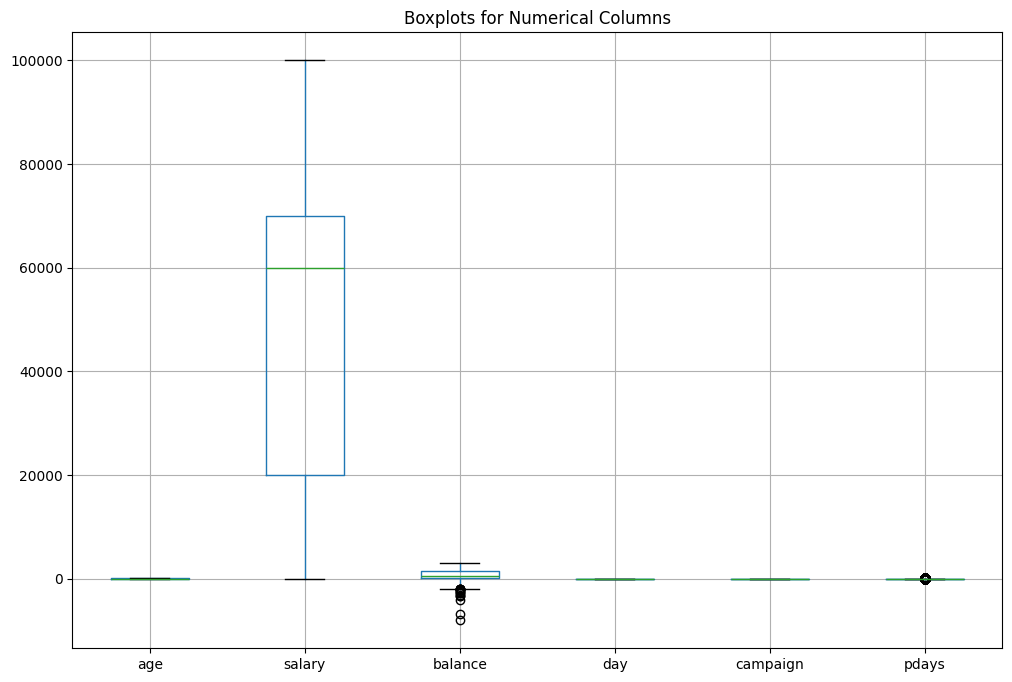

In [ ]:
#The marketing_data.boxplot() method is a function used for creating box plots for numeric columns of the dataframe

marketing_data.boxplot(figsize=(12, 8), widths=0.5)
plt.title('Boxplots for Numerical Columns')
plt.show()

# Question 3: Add titles and labels to Univariate Analaysis plot

In [ ]:
#Extract job & Education in newly from "jobedu" column.
marketing_data['job']= marketing_data["jobedu"].apply(lambda x:
x.split(",")[0])
marketing_data['education']= marketing_data["jobedu"].apply(lambda
x: x.split(",")[1])
# Drop the "jobedu" column from the dataframe.
marketing_data.drop('jobedu', axis = 1, inplace = True)
# Print the Dataset
marketing_data

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,55.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,100000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45208,55.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45209,55.0,55000,3092,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,173,3,success,yes,retired,secondary
45209,45210,55.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


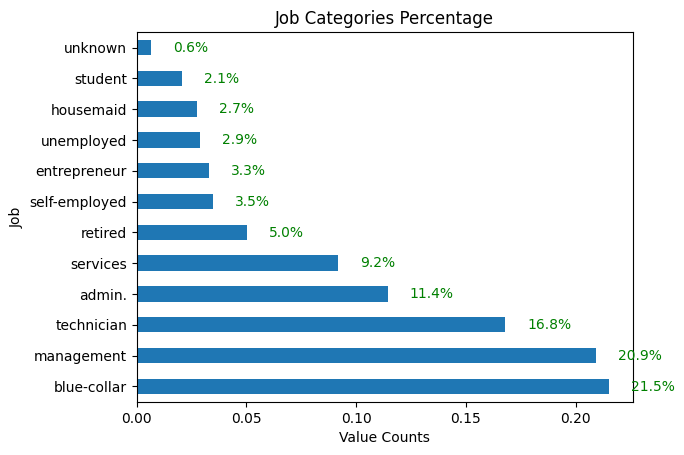

In [ ]:
# Let's calculate the percentage of each job status category
job_value_count = marketing_data.job.value_counts(normalize=True)

#plot the bar graph of percentage job categories
bar_graph = marketing_data.job.value_counts(normalize=True).plot.barh()

# Add data labels
for i, v in enumerate(job_value_count):
    bar_graph.text(v + 0.01, i, f'{v:.1%}', color='green', va='center')

#Adding title and labels
plt.title('Job Categories Percentage')
plt.xlabel('Value Counts')
plt.ylabel('Job')
plt.show()

# Question 4: There are 'unknown' values in the dataset? should we consider them missing? Explain how you would handle, and demonstrate your solution. If you decide to leave them as they are, explain whay you made this decision.

In [ ]:
# Replacing the 'unknown' values with NaN
marketing_data.replace('unknown', np.nan, inplace=True)

# Check the number of missing values after replacing 'unknown' values
missing_values_count = marketing_data.isnull().sum()
print("Number of missing values after replacing 'unknown' values:")
print(missing_values_count)

marketing_data

Number of missing values after replacing 'unknown' values:
customerid        0
age              20
salary            0
balance           0
marital           0
targeted          0
default           0
housing           0
loan              0
contact       13000
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome      36916
response         30
job             288
education      1852
dtype: int64


,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,55.0,100000,2143,married,yes,no,yes,no,NaN,5,"may, 2017",261 sec,1,-1,0,NaN,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,NaN,5,"may, 2017",151 sec,1,-1,0,NaN,no,technician,secondary
2,3,33.0,100000,2,married,yes,no,yes,yes,NaN,5,"may, 2017",76 sec,1,-1,0,NaN,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,NaN,5,"may, 2017",92 sec,1,-1,0,NaN,no,blue-collar,NaN
4,5,33.0,0,1,single,no,no,no,no,NaN,5,"may, 2017",198 sec,1,-1,0,NaN,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,NaN,yes,technician,tertiary
45207,45208,55.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,NaN,yes,retired,primary
45208,45209,55.0,55000,3092,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,173,3,success,yes,retired,secondary
45209,45210,55.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,NaN,no,blue-collar,secondary


# Question 5: Add Titles and labels to the pie chart of education categories

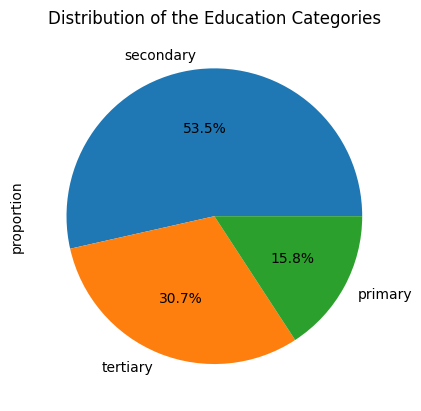

In [ ]:
#calculate the percentage of each education category.
marketing_data.education.value_counts(normalize=True)

#plot the pie chart of education categories
marketing_data.education.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribution of the Education Categories')
plt.show()

# Question 6: Perform describe on all numerical columns in the dataset and comment on three most interesting observations

In [ ]:
# Perform describe on all numerical columns
numerical_describe = marketing_data.describe(include=[np.number])
numerical_describe

,age,salary,balance,day,campaign,pdays
count,45141.000000,45161.000000,45161.000000,45161.000000,45161.000000,45161.000000
mean,40.316320,56349.017958,891.766325,15.656961,2.295941,26.597507
std,9.333059,30975.453430,1092.427718,8.079301,1.397262,60.784036
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000
max,55.000000,100000.000000,3092.000000,28.000000,5.000000,173.000000


## Observations based on the data

### Negative Balances: 
##### The "balance" column has negative values, which wouldn't normally happen in a bank account. This might be due to errors when collecting or entering the data. More investigation is needed to figure out why these negative balances exist and how to deal with them.

### "Pdays" Distribution: 
##### In the "pdays" column, the highest value is much larger than the value for the 75th percentile (meaning most entries are -1). This suggests most clients haven't been contacted before. The few higher values could represent the number of days since the last contact, but checking with someone familiar with the data (domain knowledge) would be helpful to confirm this interpretation.

### Zero Salaries: 
##### The "salary" column has entries with a value of zero, which could be missing data or salary information that wasn't recorded correctly. Someone usually wouldn't have a zero salary unless they aren't paid a regular salary or have income from other sources. Checking into these zero salary entries could help identify data quality issues in the dataset.

# Question 7: Add plots formatting - axis titles and change dots formatting(colour, size, and transparency) so it is easier to observe data patterns

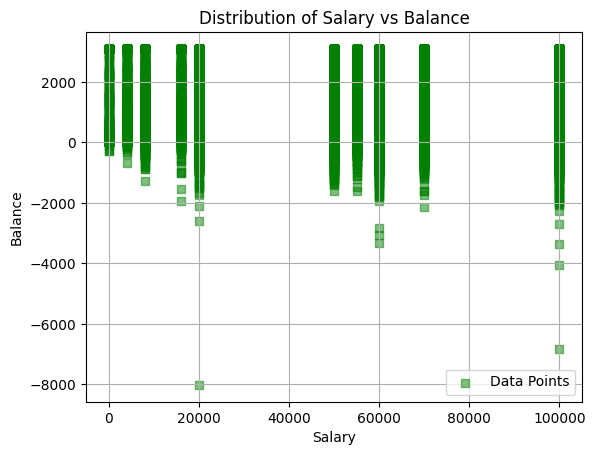

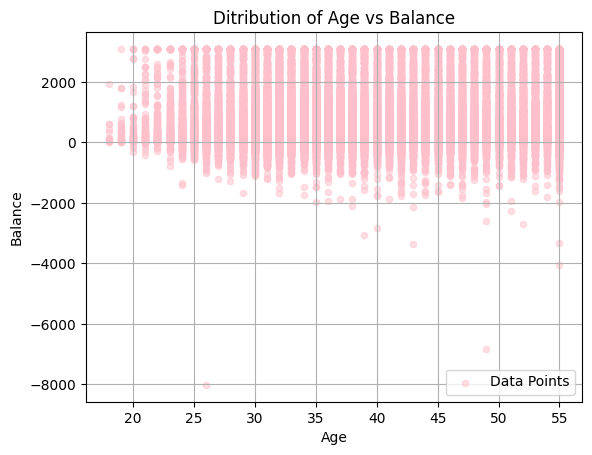

In [ ]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(marketing_data.salary,marketing_data.balance,color='green', marker='s', label='Data Points', alpha=0.5)

# Add title and labels
plt.title('Distribution of Salary vs Balance')
plt.xlabel('Salary')
plt.ylabel('Balance')

# Add grid
plt.grid(True)

# Add legend
plt.legend()
plt.show()

#plot the scatter plot of balance and age variable in data
marketing_data.plot.scatter(x="age",y="balance",color='pink', marker='o', label='Data Points', alpha=0.5)
# Add title and labels
plt.title('Ditribution of Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')

# Add grid
plt.grid(True)

# Add legend
plt.legend()
plt.show()

# Question 8: Seaborn library has variety of visualizations alternative to box plots aiming to analyze data distribution. Implement violin plots instead of box plots to look as the salary by response variable. Change colors on the plot using one of the seaborn palettes.

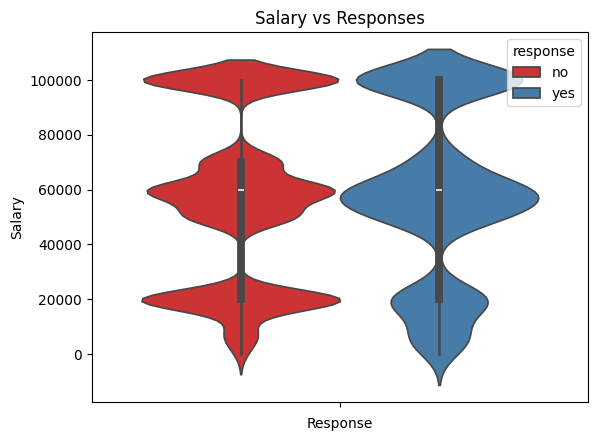

In [ ]:
# plot the violin plot of salary for yes or no responses.
sns.violinplot(hue='response', y='salary', data=marketing_data ,palette='Set1')
plt.title('Salary vs Responses')

# Add title and labels
plt.xlabel('Response')
plt.ylabel('Salary')

plt.show()

# Question 9: Add data labels and y-axis title and represent it as %.

In [ ]:
# create response rate of numerical data type where response "yes"=1 and "no"=0
marketing_data['response_rate']= np.where(marketing_data.response=='yes',1,0)
marketing_data.response_rate.value_counts()

response_rate
0    39880
1     5281
Name: count, dtype: int64

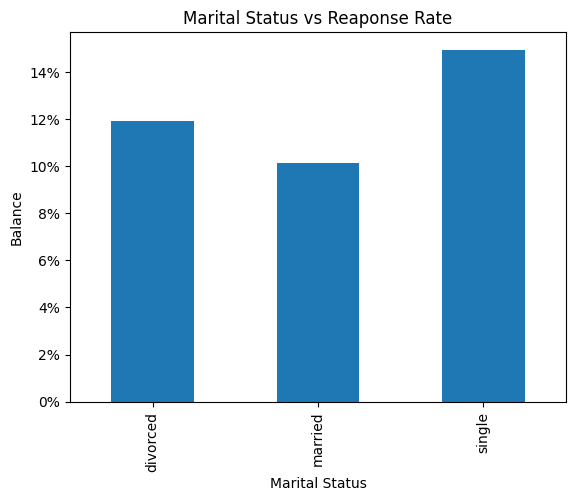

In [ ]:
from matplotlib.ticker import FuncFormatter

#plot the bar graph of marital status with average value of response_rate
marketing_data.groupby('marital')['response_rate'].mean().plot.bar()

# Define function to format ticks as percentage
def percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

# Apply percentage formatting to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage))

# Add title and labels
plt.title('Marital Status vs Reaponse Rate')
plt.xlabel('Marital Status')
plt.ylabel('Balance')


plt.show()

# Question 10: Similarly, plot the graphs for Loan vs Response Rate , housing loans vs response rate. Comment on your observations

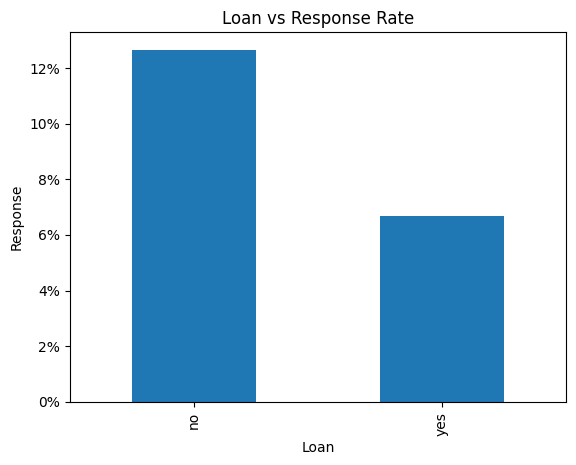

In [ ]:
#plot the bar graph of loan with average value of response_rate
marketing_data.groupby('loan')['response_rate'].mean().plot.bar()

# Define function to format ticks as percentage
def percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

# Apply percentage formatting to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage))

# Add title and labels
plt.title('Loan vs Response Rate')
plt.xlabel('Loan')
plt.ylabel('Response')


plt.show()

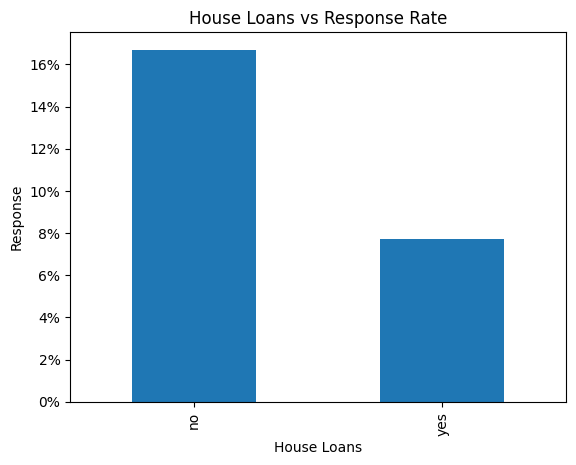

In [ ]:
#plot the bar graph of house loan with average value of response_rate
marketing_data.groupby('housing')['response_rate'].mean().plot.bar()

# Define function to format ticks as percentage
def percentage(x, pos):
    return '{:.0f}%'.format(x * 100)

# Apply percentage formatting to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage))

# Add title and labels
plt.title('House Loans vs Response Rate')
plt.xlabel('House Loans')
plt.ylabel('Response')


plt.show()

# Observations:

There's a clear trend of more negative responses than positive ones in both situations, although the severity of this imbalance differs slightly.

# Question 11: Similarly plot the graphs for job vs marital vs response, Education vs poutcome vs response. Comment on your observations.  

marital        divorced   married    single
job                                        
admin.         0.120000  0.113425  0.136153
blue-collar    0.077333  0.062787  0.105812
entrepreneur   0.083799  0.075772  0.113445
housemaid      0.098361  0.073626  0.160839
management     0.127813  0.125996  0.162190
retired        0.284706  0.221193  0.120370
self-employed  0.157143  0.079637  0.188764
services       0.089416  0.074074  0.117794
student        0.166667  0.185185  0.294185
technician     0.083333  0.102520  0.132595
unemployed     0.157895  0.132695  0.194514


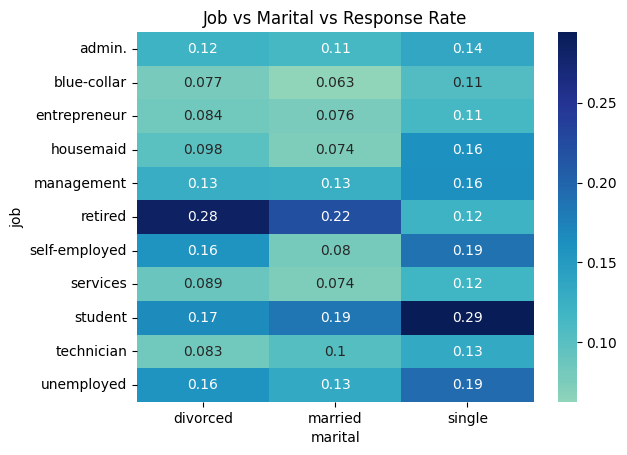

In [ ]:
# create pivot table
result=pd.pivot_table(marketing_data, index='job', columns='marital',values='response_rate')
print(result)

# create heap map of job vs martial vs response rate
sns.heatmap(result, annot=True, cmap='YlGnBu', center=0.117)

#Adding title
plt.title('Job vs Marital vs Response Rate')
plt.show()

# Observations from the pivot table (marital status vs. job):

### 1.Retired individuals:
Retired individuals have the largest rate of divorced people compared to other occupations. This shows that retirement may be related with an increased risk of divorce.
  
### 2. Students:
Students have the largest number of single people compared to other occupations.Students are often younger and may not have married yet, so this is to be expected.

### 3. Self-employed:

Self-employed people are more likely to be single than people in other jobs. This could be due to the freedom and independence that come with self-employment, which may appeal those who aren't already pursuing power.


poutcome    failure     other   success
education                              
primary    0.088785  0.143443  0.609023
secondary  0.108964  0.140831  0.641902
tertiary   0.167785  0.220588  0.657005


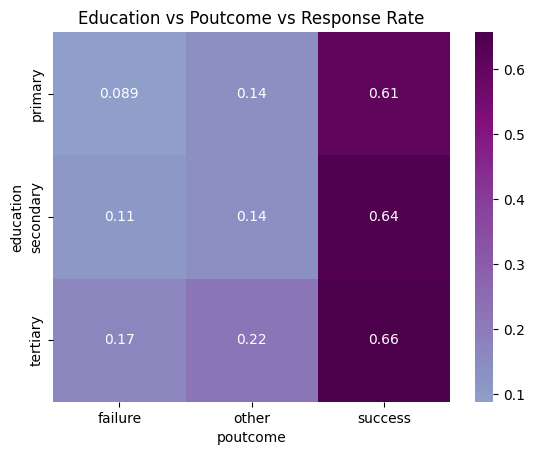

In [ ]:
# create pivot table
result=pd.pivot_table(marketing_data, index='education', columns='poutcome',values='response_rate')
print(result)

# create heap map of education vs poutcome vs response rate
sns.heatmap(result, annot=True, cmap='BuPu', center=0.117)

#Adding title
plt.title('Education vs Poutcome vs Response Rate')
plt.show()

# Observations from the pivot table (education vs. poutcome):

1. **Success rates**: Individuals with successful outcomes (success) in prior marketing campaigns had the highest percentage at all educational levels. This shows that prior campaigns' success is not highly connected with education levels.

2. **Primary education**: Individuals with primary education have the lowest success rate when compared to other educational levels. This could mean that those with lower education levels are less likely to respond positively to marketing promotions.

3. **Tertiary education**: Individuals with tertiary education have the highest proportion of successful outcomes compared to other education levels. This suggests that those with higher levels of education may be more open to marketing campaigns or have more purchasing power.